In [4]:
# loading data into dataframes
# SCADA.csv is the labeled dataset
import pandas as pd

df = pd.read_csv("data/all-in-one.csv")

## Create 3 datasets with different features

These 3 datasets will be used to train 3 uIDS on diferent attributes

In [5]:
from sklearn.model_selection import train_test_split

# dropping columns from the dataframes

df1 = df.drop(
    columns=[
        "cpu_time.iowait",
        "cpu_time.irq",
        "memory_percent",
        "conn_count.udp",
        "tcp_state.listen",
    ]
)
df2 = df.drop(
    columns=[
        "net_byte.tx",
        "net_byte.rx",
        "net_pkt.tx",
        "net_pkt.rx",
        "conn_count.tcp",
        "conn_count.udp",
        "tcp_state.listen",
        "tcp_state.established",
        "is_user_operating",
    ]
)
df3 = df.drop(
    columns=[
        "cpu_percent",
        "cpu_time.user",
        "cpu_time.sys",
        "cpu_time.idle",
        "cpu_time.nice",
        "cpu_time.iowait",
        "cpu_time.irq",
        "cpu_time.softirq",
        "memory_percent",
        "is_user_operating",
    ]
)

# One hot encoding the 'src' column
df1 = pd.get_dummies(df1, columns=["src"])
df2 = pd.get_dummies(df2, columns=["src"])
df3 = pd.get_dummies(df3, columns=["src"])

display(df1.describe())
display(df2.describe())
display(df3.describe())

def split_dataset(dataframe: pd.DataFrame):
    x = dataframe.drop(columns='is_attack')  # Features (attributes)
    y = dataframe['is_attack']  # Target (truth values)
    return train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)


x_train1, x_test1, y_train1, y_test1 = split_dataset(df1)
x_train2, x_test2, y_train2, y_test2 = split_dataset(df2)
x_train3, x_test3, y_train3, y_test3 = split_dataset(df3)

# Check if y_test1 and y_test2 and y_test3 are the same
assert y_test1.equals(y_test2) and y_test2.equals(y_test3)

,timestamp,cpu_percent,cpu_time.user,cpu_time.sys,cpu_time.idle,cpu_time.nice,cpu_time.softirq,net_byte.tx,net_byte.rx,net_pkt.tx,net_pkt.rx,conn_count.tcp,tcp_state.established,is_user_operating,is_attack
count,1.077210e+05,107721.000000,107721.000000,107721.000000,107721.000000,107721.000000,107721.000000,1.077210e+05,1.077210e+05,107721.000000,107721.000000,107721.000000,107721.000000,107721.000000,107721.000000
mean,1.669600e+09,8.048398,1.803905,3.194792,87.773042,0.015447,2.654224,6.376889e+04,2.490792e+05,1049.090716,2067.764976,27.969857,3.113200,0.008633,0.457144
std,3.115997e+04,14.894753,1.288283,1.427660,14.270807,0.750172,14.163500,3.297654e+05,1.333715e+06,5497.354720,11039.392210,91.261567,1.422675,0.092515,0.498162
min,1.669546e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,10.000000,2.000000,0.000000,0.000000
25%,1.669573e+09,4.200000,1.000000,2.000000,89.000000,0.000000,0.000000,2.073000e+03,1.669000e+03,31.000000,30.000000,10.000000,2.000000,0.000000,0.000000
50%,1.669600e+09,5.200000,2.000000,3.000000,90.000000,0.000000,0.000000,2.237000e+03,1.833000e+03,34.000000,33.000000,10.000000,2.000000,0.000000,0.000000
75%,1.669627e+09,6.300000,2.000000,4.000000,92.000000,0.000000,0.000000,2.825000e+03,2.699000e+03,37.000000,37.000000,12.000000,5.000000,0.000000,1.000000
max,1.669654e+09,100.000000,58.000000,89.000000,98.000000,60.000000,94.000000,2.682990e+06,1.085584e+07,44713.000000,89982.000000,533.000000,11.000000,1.000000,1.000000


,timestamp,cpu_percent,cpu_time.user,cpu_time.sys,cpu_time.idle,cpu_time.nice,cpu_time.iowait,cpu_time.irq,cpu_time.softirq,memory_percent,is_attack
count,1.077210e+05,107721.000000,107721.000000,107721.000000,107721.000000,107721.000000,107721.000000,107721.0,107721.000000,107721.000000,107721.000000
mean,1.669600e+09,8.048398,1.803905,3.194792,87.773042,0.015447,0.009655,0.0,2.654224,63.625894,0.457144
std,3.115997e+04,14.894753,1.288283,1.427660,14.270807,0.750172,0.101965,0.0,14.163500,3.051631,0.498162
min,1.669546e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,58.883000,0.000000
25%,1.669573e+09,4.200000,1.000000,2.000000,89.000000,0.000000,0.000000,0.0,0.000000,60.316000,0.000000
50%,1.669600e+09,5.200000,2.000000,3.000000,90.000000,0.000000,0.000000,0.0,0.000000,64.101000,0.000000
75%,1.669627e+09,6.300000,2.000000,4.000000,92.000000,0.000000,0.000000,0.0,0.000000,66.648000,1.000000
max,1.669654e+09,100.000000,58.000000,89.000000,98.000000,60.000000,3.000000,0.0,94.000000,71.610000,1.000000


,timestamp,net_byte.tx,net_byte.rx,net_pkt.tx,net_pkt.rx,conn_count.tcp,conn_count.udp,tcp_state.listen,tcp_state.established,is_attack
count,1.077210e+05,1.077210e+05,1.077210e+05,107721.000000,107721.000000,107721.000000,107721.000000,107721.0,107721.000000,107721.000000
mean,1.669600e+09,6.376889e+04,2.490792e+05,1049.090716,2067.764976,27.969857,3.000111,7.0,3.113200,0.457144
std,3.115997e+04,3.297654e+05,1.333715e+06,5497.354720,11039.392210,91.261567,0.016122,0.0,1.422675,0.498162
min,1.669546e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,10.000000,2.000000,7.0,2.000000,0.000000
25%,1.669573e+09,2.073000e+03,1.669000e+03,31.000000,30.000000,10.000000,3.000000,7.0,2.000000,0.000000
50%,1.669600e+09,2.237000e+03,1.833000e+03,34.000000,33.000000,10.000000,3.000000,7.0,2.000000,0.000000
75%,1.669627e+09,2.825000e+03,2.699000e+03,37.000000,37.000000,12.000000,3.000000,7.0,5.000000,1.000000
max,1.669654e+09,2.682990e+06,1.085584e+07,44713.000000,89982.000000,533.000000,7.000000,7.0,11.000000,1.000000


## Train and Test on different models

In [6]:
# Utility function to plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix


def plot_confusion_matrix(y_test, pred):
    conf_matrix = confusion_matrix(y_test, pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

### Decision tree

In [7]:
from sklearn import tree

# choose from different tunable hyper parameters
clf1 = tree.DecisionTreeClassifier(criterion="entropy")
clf2 = tree.DecisionTreeClassifier(criterion="entropy")
clf3 = tree.DecisionTreeClassifier(criterion="entropy")

# Creating the model on Training Data
DTree1 = clf1.fit(x_train1, y_train1)
pred1 = DTree1.predict(x_test1)

DTree2 = clf2.fit(x_train2, y_train2)
pred2 = DTree2.predict(x_test2)

DTree3 = clf3.fit(x_train3, y_train3)
pred3 = DTree3.predict(x_test3)

# record results
pred_dt = [pred1, pred2, pred3]

# Evaluate the model
accuracy1 = accuracy_score(y_test1, pred1)
accuracy2 = accuracy_score(y_test2, pred2)
accuracy3 = accuracy_score(y_test3, pred3)

print(f"Accuracy: {accuracy1}, {accuracy2}, {accuracy3}")

Accuracy: 0.9999071710373637, 0.9999535855186819, 0.999721513112091


#### Confusion matrices

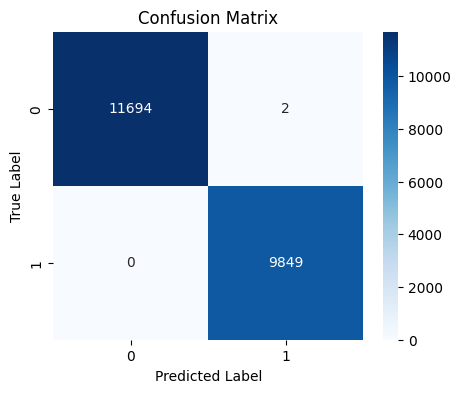

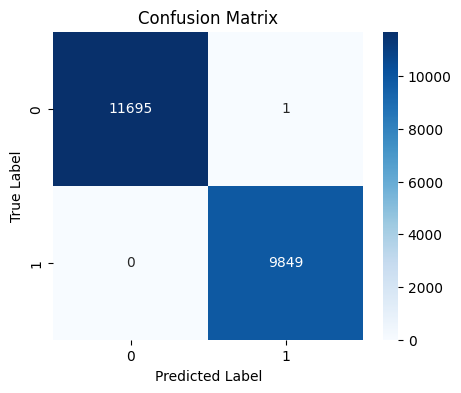

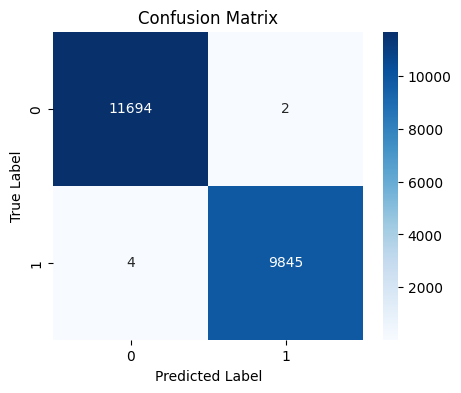

In [8]:
plot_confusion_matrix(y_test1, pred1)
plot_confusion_matrix(y_test2, pred2)
plot_confusion_matrix(y_test3, pred3)

### Random Forest

In [9]:
# Random forest - 95.31%
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 10000 decision trees
rf1 = RandomForestClassifier(n_estimators=2000, random_state=42)
rf2 = RandomForestClassifier(n_estimators=2000, random_state=42)
rf3 = RandomForestClassifier(n_estimators=2000, random_state=42)
# Train the model on training data
rf1.fit(x_train1, y_train1)
pred1 = rf1.predict(x_test1)

rf2.fit(x_train2, y_train2)
pred2 = rf2.predict(x_test2)

rf3.fit(x_train3, y_train3)
pred3 = rf3.predict(x_test3)

# record results
pred_rf = [pred1, pred2, pred3]

# Evaluate the model
accuracy1 = accuracy_score(y_test1, pred1)
accuracy2 = accuracy_score(y_test2, pred2)
accuracy3 = accuracy_score(y_test3, pred3)

print(f"Accuracy: {accuracy1}, {accuracy2}, {accuracy3}")

# record results
pred_dt = [pred1, pred2, pred3]

Accuracy: 0.9999071710373637, 0.9999535855186819, 0.9999071710373637


#### Confusion matrix

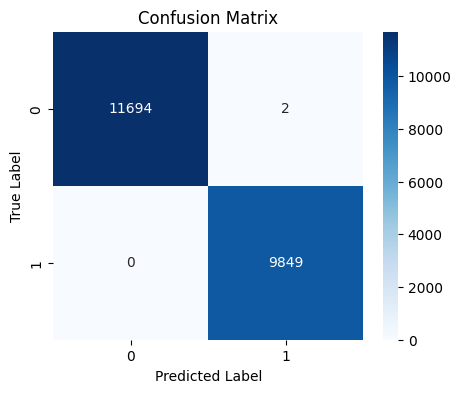

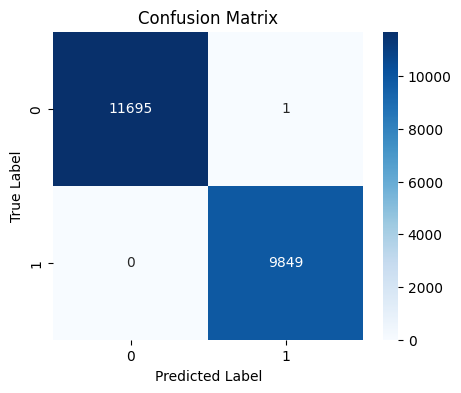

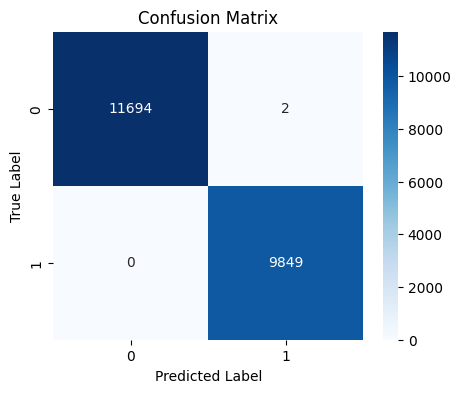

In [10]:
plot_confusion_matrix(y_test1, pred1)
plot_confusion_matrix(y_test2, pred2)
plot_confusion_matrix(y_test3, pred3)

### Gaussian NB

In [11]:
# Gaussian NB - 64.6%
from sklearn.naive_bayes import GaussianNB

gnb1 = GaussianNB()
gnb2 = GaussianNB()
gnb3 = GaussianNB()

gnb1.fit(x_train1, y_train1)
pred1 = gnb1.predict(x_test1)

gnb2.fit(x_train2, y_train2)
pred2 = gnb2.predict(x_test2)

gnb3.fit(x_train3, y_train3)
pred3 = gnb3.predict(x_test3)

# record results
pred_gnb = [pred1, pred2, pred3]

# Evaluate the model
accuracy1 = accuracy_score(y_test1, pred1)
accuracy2 = accuracy_score(y_test2, pred2)
accuracy3 = accuracy_score(y_test3, pred3)

print(f"Accuracy: {accuracy1}, {accuracy2}, {accuracy3}")

Accuracy: 0.64390809932699, 0.9456950568577396, 0.64390809932699


#### Confusion matrix

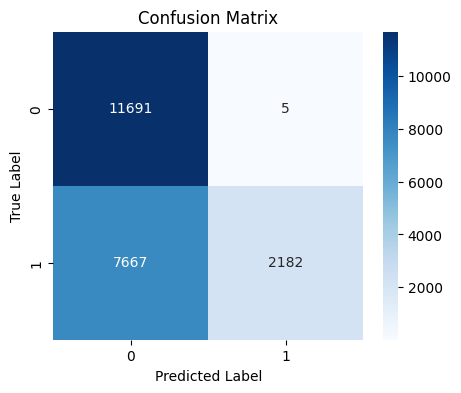

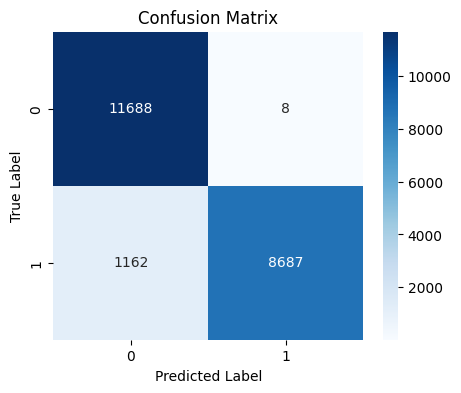

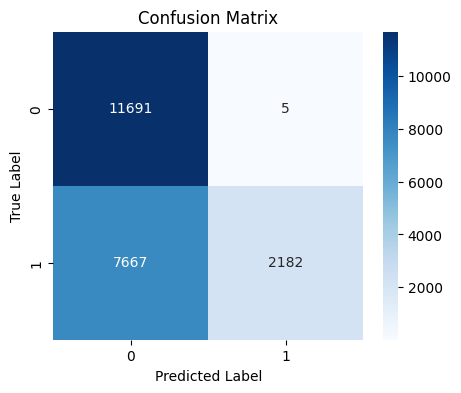

In [12]:
plot_confusion_matrix(y_test1, pred1)
plot_confusion_matrix(y_test2, pred2)
plot_confusion_matrix(y_test3, pred3)

### SVC

In [13]:
# SVC - 64.69%
from sklearn.svm import SVC

svc1 = SVC()
svc2 = SVC()
svc3 = SVC()

svc1.fit(x_train1, y_train1)
pred1 = svc1.predict(x_test1)

svc2.fit(x_train2, y_train2)
pred2 = svc2.predict(x_test2)

svc3.fit(x_train3, y_train3)
pred3 = svc3.predict(x_test3)

# record results
pred_svc = [pred1, pred2, pred3]

# Evaluate the model
accuracy1 = accuracy_score(y_test1, pred1)
accuracy2 = accuracy_score(y_test2, pred2)
accuracy3 = accuracy_score(y_test3, pred3)

print(f"Accuracy: {accuracy1}, {accuracy2}, {accuracy3}")

Accuracy: 0.5428637734973312, 0.5428637734973312, 0.5428637734973312


#### Confusion matrix

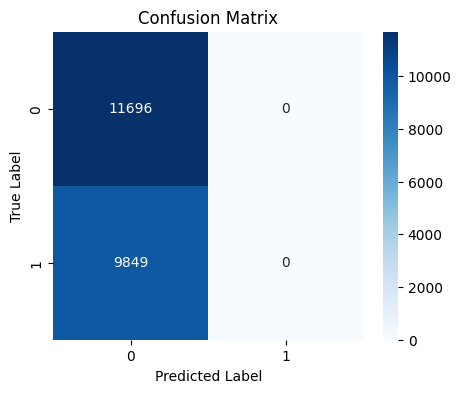

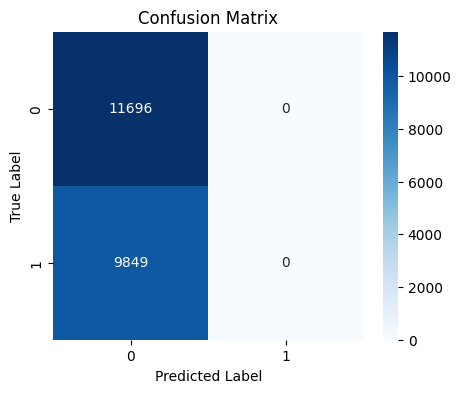

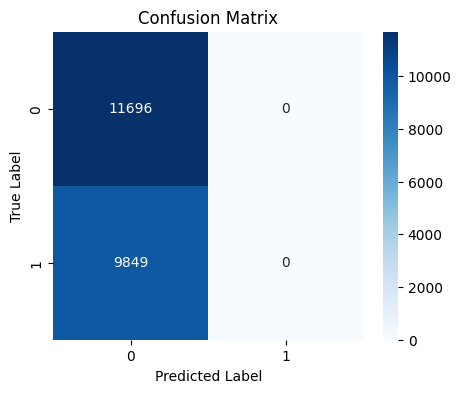

In [14]:
plot_confusion_matrix(y_test1, pred1)
plot_confusion_matrix(y_test2, pred2)
plot_confusion_matrix(y_test3, pred3)

### KNN (n=2)

In [15]:
# KNN - 95.06%
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier(n_neighbors=2)
knn2 = KNeighborsClassifier(n_neighbors=2)
knn3 = KNeighborsClassifier(n_neighbors=2)

knn1.fit(x_train1, y_train1)
pred1 = knn1.predict(x_test1)

knn2.fit(x_train2, y_train2)
pred2 = knn2.predict(x_test2)

knn3.fit(x_train3, y_train3)
pred3 = knn3.predict(x_test3)

# record results
pred_knn = [pred1, pred2, pred3]

# Evaluate the model
accuracy1 = accuracy_score(y_test1, pred1)
accuracy2 = accuracy_score(y_test2, pred2)
accuracy3 = accuracy_score(y_test3, pred3)

print(f"Accuracy: {accuracy1}, {accuracy2}, {accuracy3}")

Accuracy: 0.9999535855186819, 1.0, 0.9999535855186819


#### Confusion matrix

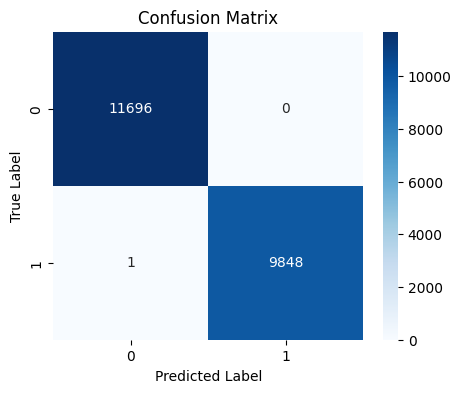

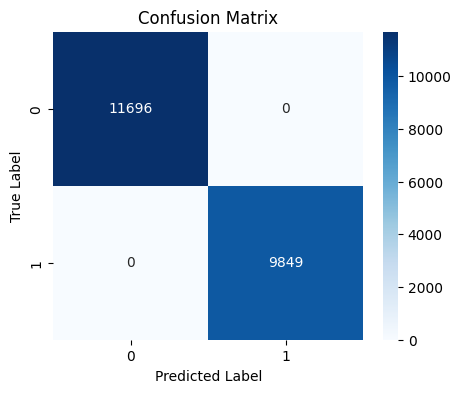

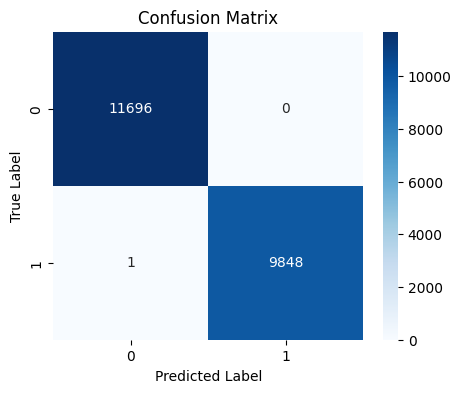

In [16]:
plot_confusion_matrix(y_test1, pred1)
plot_confusion_matrix(y_test2, pred2)
plot_confusion_matrix(y_test3, pred3)

## Voting Evaluation

In [17]:
import itertools

# Create a list of variables
var_list = ["pred_dt", "pred_rf", "pred_gnb", "pred_svc", "pred_knn"]

# loop and evaluate all combinations
evaluations = []
for comb in [(i, j, k) for i in var_list for j in var_list for k in var_list]:
    res1 = globals()[comb[0]][0]
    res2 = globals()[comb[1]][1]
    res3 = globals()[comb[2]][2]
    pred = [1 if (res1[i] + res2[i] + res3[i]) > 1 else 0 for i in range(len(res1))]
    accuracy = accuracy_score(y_test1, pred)

    # put result in a dataframe
    name1 = comb[0].split("_")[1]
    name2 = comb[1].split("_")[1]
    name3 = comb[2].split("_")[1]
    evaluations.append({"1st": name1, "2nd": name2, "3rd": name3, "accuracy": accuracy})

evaluations = pd.DataFrame(evaluations)
pd.set_option('display.max_rows', None) # WARNING: Will display all rows
display(evaluations.sort_values(by="accuracy", ascending=False))

,1st,2nd,3rd,accuracy
70,gnb,knn,dt,1.000000
14,dt,gnb,knn,1.000000
39,rf,gnb,knn,1.000000
96,svc,knn,rf,1.000000
95,svc,knn,dt,1.000000
107,knn,rf,gnb,1.000000
24,dt,knn,knn,1.000000
23,dt,knn,svc,1.000000
22,dt,knn,gnb,1.000000
47,rf,knn,gnb,1.000000
